# LABORATORIO 6


For the cubic equation
$$ ax^3+bx^+cx +d = 0$$

and use Cubic equation General cubic formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)


$$ Δ_0=b^2 -3ac $$

$$ Δ_1=2b^3 -9abc+27a^2d $$

$$C=\sqrt[3]{\frac{Δ_1 \pm \sqrt{Δ_1^2-4Δ_0^3}}{2}}$$

The sign "$\pm$" before the square root is either "+" or "–"; the choice is almost arbitrary, and changing it amounts to choosing a different square root. However, if a choice yields C = 0 (this occurs if $\Delta_0 = 0 $, then the other sign must be selected instead. If both choices yield C = 0, that is, if
$\Delta_0 = 0 $ and $\Delta_1 = 0 $ a fraction ⁠$\frac{0}{0}$ occurs in following formulas; this fraction must be interpreted as equal to zero (see the end of this section). With these conventions, the three roots are

$$x_k=-\frac{1}{3a}\left(b+ \xi^k C+\frac{Δ_0}{\xi^k C}\right), \hspace{2cm} k \in \{1,2,3\}$$


with
$\xi$ a primitive cube root of unity, i.e.,
$$\xi = \left( -\frac{1}{2} \pm \frac{\sqrt{3}}{2} i \right)$$

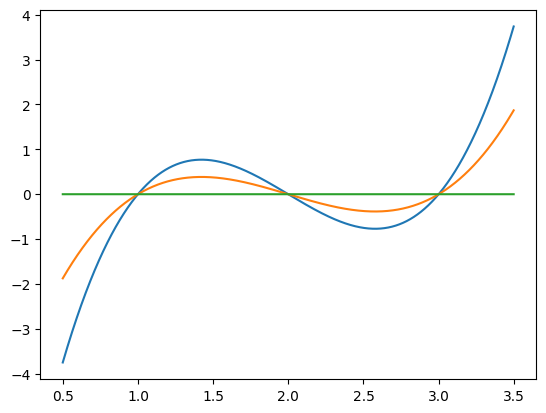

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cubic(a,b,c,d,x):
    return a*x**3+b*x**2+c*x+d

def cubicequiv(a,b,c,d,x):
    return x**3+(b/a)*x**2+(c/a)*x+(d/a)

x = np.arange(0.5, 3.5, 0.001)
z = np.zeros(len(x))
y = cubic(2,-12,22,-12,x)
ynew = cubicequiv(2,-12,22,-12,x)
plt.plot(x, y, x, ynew, x,z)
plt.show()

In [ ]:
# Calculate a cube roots https://stackoverflow.com/questions/60499277/cube-roots-of-a-complex-number-in-python

x=1
f = 1j**(2/3)
C1 = complex(1)**(1/3)
C2 = -C1*f # rotate 2pi/3
C3 = complex(C2.real,-C2.imag)
print(C1,C2,C3,C1*f**2)

(1+0j) (-0.5000000000000001-0.8660254037844386j) (-0.5000000000000001+0.8660254037844386j) (-0.4999999999999998+0.8660254037844388j)


Asuume $a=1$ then the equations are of the form

$$ x^3+bx^2+cx +d = 0$$ and complete the following function.

In [ ]:
import cmath

def solve_cubic(b,c,d):
    """Solve a cubic equation, x**3 + bx**2 + c*x +d = 0.

    Parameters
    ----------
    b, c,d : float
       Coefficients

    Returns
    -------
    x1, x2,x3 : float or complex
       Roots.  """
    x1 = x2 = x3 = cmath.nan
    # ... enter your code here ...
    # Deltas
    delta_0 = (b ** 2) - (3 * c)
    delta_1 = (2 * (b ** 3)) - (9 * b * c) + (27 * d)

    # Discriminant
    discriminant = (delta_1 ** 2) - (4 * (delta_0 ** 3))

    # Try with C_plus
    C = ((delta_1 + cmath.sqrt(discriminant)) / 2) ** (1/3)

    # If C is zero, try the other one (C_minus)
    if abs(C) < 1e-10:
        C = ((delta_1 - cmath.sqrt(discriminant)) / 2) ** (1/3)

    # (delta_0/C), if delta_0 is too small use 0
    if abs(C) < 1e-10:
        delta_0_over_C = 0
    else:
        delta_0_over_C = delta_0 / C

    omega = (-1 + cmath.sqrt(-3)) / 2
    x1 = -(b + C + delta_0_over_C) / 3
    if abs(delta_0_over_C) < 1e-10:
        x2 = x1
        x3 = x1
    else:
        x2 = -(b + (omega * C) + (delta_0_over_C / omega)) / 3
        x3 = -(b + ((omega ** 2) * C) + (delta_0_over_C / (omega ** 2))) / 3

    return (x1,x2,x3)

Test cases that include
$$(x-1)(x-2)(x-3) = x^3 - 6 x^2 + 11 x - 6 = 0 $$

$$(x-1) \left( x + \frac{1}{2} + i \frac{\sqrt{3}}{2}\right) \left( x + \frac{1}{2} - i \frac{\sqrt{3}}{2}\right) =   x^3 -1 =  0  $$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1 = 0 $$

$$(x)(x-i)(x+i) = x^3 + x  = 0 $$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1 = 0 $$

$$ (x+2)^2 (x-1) = x^3 + 3 x^2 - 4 = 0  $$

$$ (x+2)^2 (x-1) = x^3 + 10^6 x^2  = 0  $$

$$ (x+2)^2 (x-1) = x^3 + 10^7 x^2  = 0  $$
three real diferent roots,  roots in the last digits of the group members, root of multiplicity two, and complex roots with small and large $b$.

**Last digits:**

In [ ]:
from numpy import allclose

variants = [{'b': -6.0, 'c': 11.0, 'd': -6.0},
            {'b':  0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b':  0.0, 'c': 0.0,  'd': 1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(1,var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(1,var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(1,var['b'],var['c'],var['d'],x3), 0.0))


True
True
True
True
True
True
True
True


In [ ]:
# ChatGPT cubic equation with large b python
import numpy as np

def solve_cubic_np_roots(b,c,d):

  # Create a numpy array with the coefficients
  coefficients = [1, b, c, d]

  # Find the roots of the cubic equation
  roots = np.roots(coefficients)

  return roots



In [ ]:
from numpy import allclose

variants = [{'b': -6.0, 'c': 11.0, 'd': -6.0},
            {'b':  0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b':  0.0, 'c': 0.0,  'd': 1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},]

for var in variants:
             x1, x2, x3= solve_cubic_np_roots(**var)
             print(allclose(cubic(1,var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(1,var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(1,var['b'],var['c'],var['d'],x3), 0.0))


True
True
True
True
True
True
True
True


In [ ]:
# ChatGPT cubic equation with large b python (regenerate)

import sympy as sp

def solve_cubic_sympy_solve(b,c,d):
  # Define the variables
  x = sp.symbols('x')

  # Define the cubic equation with a large 'b' coefficient
  equation = x**3 + b*x**2 + c*x + d

  # Solve the cubic equation
  roots= sp.solve(equation, x)

  return roots



In [ ]:
from numpy import allclose

variants = [{'b': -6.0, 'c': 11.0, 'd': -6.0},
            {'b':  0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b':  0.0, 'c': 0.0,  'd': 1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},]

for var in variants:
             roots = solve_cubic_sympy_solve(**var)
             ans = True
             for root in roots:
               ans = ans and allclose(cubic(1,var['b'],var['c'],var['d'],complex(root)), 0.0)
             print(ans)




True
True
True
True
True
True
True
True


In [ ]:
from sympy import init_printing
init_printing()


b = 10e7  # Large 'b' coefficient
c = -1000.0
d = 1.0

roots = solve_cubic_sympy_solve(b,c,d)
roots

[-100000000.00001, 5.0000000000495e-6 - 9.98749217771834e-5⋅ⅈ, 5.0000000000495e-6 + 9.987492177718 ↪

↪ 34e-5⋅ⅈ]

In [ ]:
from sympy import N
for root in roots:
    print(complex(root), cubic(1,b,c,d,complex(root)))

(-100000000.00001+0j) (7792641.009994507+0j)
(5.0000000000495e-06-9.98749217771834e-05j) 0j
(5.0000000000495e-06+9.98749217771834e-05j) 0j


All methods fail in some cases

In [ ]:
from numpy import allclose

variants = [{'b': -6.0, 'c': 11.0, 'd': -6.0},
            {'b':  0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b':  0.0, 'c': 0.0,  'd': 1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},
            {'b':  1.0, 'c':  0.0, 'd': -1.0},
            {'b': -1.0, 'c': 0.0,  'd': 1.0},
            {'b':  1e6, 'c': -1.0,  'd':0.0},
            {'b':  1e7, 'c': -1.0,  'd':0.0},
            {'b':  -1e6, 'c': 1.0,  'd':0.0},
            {'b':  -1e7, 'c': 1.0,  'd':0.0},
            {'b':  -1e6, 'c': -1.0,  'd':0.0},
            {'b':  -1e7, 'c': -1.0,  'd':0.0},
            {'b':  1e6, 'c': 1.0,  'd':1.0},
            {'b':  1e6, 'c': 1.0,  'd':-1.0},
            {'b':  1e6, 'c': -1.0,  'd':1.0},
            {'b':  1e6, 'c': -1.0,  'd':-1.0},
            {'b':  1e7, 'c': 1.0,  'd':1.0},
            {'b':  1e7, 'c': 1.0,  'd':-1.0},
            {'b':  1e7, 'c': -1.0,  'd':1.0},
            {'b':  1e7, 'c': -1.0,  'd':-1.0},
            {'b':  1e8, 'c': 1.0,  'd':1.0},
            {'b':  1e8, 'c': 1.0,  'd':-1.0},
            {'b':  1e8, 'c': -1.0,  'd':1.0},
            {'b':  1e8, 'c': -1.0,  'd':-1.0},]

for var in variants:

   x1, x2, x3= solve_cubic(**var)
   print(allclose(cubic(1,var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(1,var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(1,var['b'],var['c'],var['d'],x3), 0.0))

   x1, x2, x3= solve_cubic_np_roots(**var)
   print(allclose(cubic(1,var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(1,var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(1,var['b'],var['c'],var['d'],x3), 0.0))

   roots = solve_cubic_sympy_solve(**var)
   ans = True
   for root in roots:
        ans = ans and allclose(cubic(1,var['b'],var['c'],var['d'],complex(root)), 0.0)
   print(ans)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
